We continue the troubleshooting of the potential evolution curve on this notebook, and we move all our new utility functions to the evolutionTools.py file.

In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing

from scipy.optimize import fsolve   # Numerically solve non-linear system of equations
from scipy.optimize import minimize # Numerically minimize scalar multivariable function

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

import cv2                      # In case I have to write code similar to that of Wu Yifan
import os
import matplotlib.animation as ani
import sympy as sp
import utils                    # Wu Yifan's image/video processing functions
from PIL import Image           # Movie creation
import threading                # MultiThreading
import random
import evolutionTools as evt    # Contains functions from notebook2
from copy import deepcopy

In [3]:
def upperSemiCircle(R, x):   #return the f(x) array where f maps to a 
                             #semi-circle centered at the origin of radius R
                             # Assumes all x_i in [-R,R]
    return np.sqrt(R**2-x**2)

We will hard a cornea deformation that corresponds to a straight line, and observe the potential and node displacement behavior. We also want to start with equidistant nodes as they may be more informative during the analysis of the potential and displacement profiles. To this end, we will work with a semi-circle to represent the cornea.

We will consider a semi-circular cornea of radius $R=4$, centered at the origin. We will tag equidistant nodes by keeping the same polar angle between two consecutive nodes. We want $N+1$ segments (or arcs), so we have $N+1$ angles, so our separation angle writes $\theta_{sep} = \pi/ (N+1)$. Then, to retrieve the desired $x-$nodes, we can proceed as follows:


- Set $\theta = \pi$, and tag $x_0 = R\cos\theta = -4$.


- For $i = 1,...,N$: subtract $\theta_{sep}$ from $\theta$, and set $x_i = R\cos \theta$.


- Set $x_{N+1} = R (\cos 0 ) = R$.

In [4]:
R = 4
x = np.zeros(evt.N + 2)
x[0] = -R
x[evt.N +1] = R
theta = np.pi
sep = np.pi/(evt.N + 1)

In [5]:
for i in range(1, evt.N+1):
    theta -= sep
    x[i] = R * cos(theta)

In [6]:
y = upperSemiCircle(R, x)

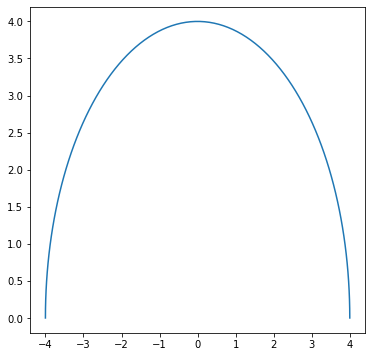

In [7]:
plt.figure(figsize = (6,6))
plt.plot(x,y)
plt.show()     #Sanity Check?

In [8]:
evt.initialLengthsFinder(x,y)   #Sanity Check

array([0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145, 0.1244145,
       0.1244145, 0.1244145, 0.1244145, 0.1244145, 

In [9]:
np.sum(evt.initialLengthsFinder(x,y))

12.565864031643507

In [10]:
np.pi*8*0.5

12.566370614359172

A little bit of truncation error but it should be fine for our current purposes. The final state is a striaght line, which we easily code.

In [11]:
y_new = np.zeros(evt.N+2)

In [12]:
displacements = minimize(evt.potentialEnergy, np.zeros(evt.N), args = (x, y_new, evt.initialLengthsFinder(x,y), evt.K))

In [13]:
displacements.x

array([ 0.07727303,  0.15067755,  0.2202206 ,  0.28591043,  0.34776054,
        0.40578731,  0.46001192,  0.51045786,  0.5571535 ,  0.6001296 ,
        0.63942153,  0.6750682 ,  0.70711183,  0.7355982 ,  0.76057552,
        0.78209672,  0.80021741,  0.81499731,  0.8264985 ,  0.8347862 ,
        0.83992882,  0.84199806,  0.84106909,  0.83721936,  0.83052896,
        0.82108089,  0.80896099,  0.79425812,  0.77706298,  0.75746832,
        0.73556944,  0.71146422,  0.68525371,  0.65703986,  0.62692632,
        0.59501766,  0.56142155,  0.52624806,  0.48960841,  0.45161432,
        0.41237786,  0.3720141 ,  0.33063974,  0.28837183,  0.24532619,
        0.20161949,  0.15737193,  0.11270604,  0.06774288,  0.02259991,
       -0.0226123 , -0.06775527, -0.11271843, -0.15738432, -0.20163187,
       -0.24533857, -0.28838418, -0.33065208, -0.37202642, -0.41239016,
       -0.45162659, -0.48962064, -0.52626025, -0.56143369, -0.59502973,
       -0.62693834, -0.6570518 , -0.68526556, -0.71147599, -0.73

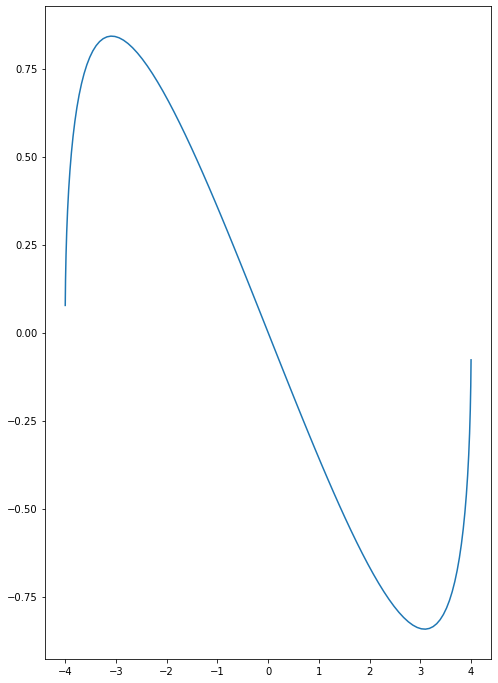

In [14]:
plt.figure(figsize = (8,12))
plt.plot(x[1:-1], displacements.x)
plt.show()

The above isn't quite relevant, but we are interested in the new lengths and the energy distribution.

In [15]:
x_new = deepcopy(x)

for i in range(1, x_new.shape[0]-1):
    x_new[i] += displacements.x[i-1]
    
newLengths = evt.initialLengthsFinder(x_new, y_new)

In [16]:
newLengths

array([0.0792079 , 0.07920726, 0.07920804, 0.07920774, 0.07920784,
       0.07920753, 0.07920793, 0.07920763, 0.07920787, 0.07920743,
       0.07920731, 0.07920747, 0.07920772, 0.07920813, 0.07920766,
       0.07920767, 0.07920746, 0.0792079 , 0.07920808, 0.07920798,
       0.07920767, 0.07920741, 0.0792077 , 0.07920791, 0.07920786,
       0.07920771, 0.07920762, 0.07920804, 0.07920831, 0.07920807,
       0.07920754, 0.07920708, 0.07920772, 0.07920833, 0.07920866,
       0.07920778, 0.07920711, 0.07920735, 0.07920817, 0.07920863,
       0.07920777, 0.0792074 , 0.07920804, 0.07920908, 0.07920844,
       0.07920617, 0.07920519, 0.07920732, 0.07921066, 0.07921134,
       0.07920229, 0.07921135, 0.07921066, 0.07920733, 0.0792052 ,
       0.07920617, 0.07920845, 0.0792091 , 0.07920806, 0.07920742,
       0.0792078 , 0.07920867, 0.07920821, 0.0792074 , 0.07920717,
       0.07920785, 0.07920873, 0.07920842, 0.07920781, 0.07920719,
       0.07920765, 0.0792082 , 0.07920845, 0.0792082 , 0.07920

Nodes remain equidistant after displacement. Note that, one can notice that the potential energy function doesn't care what the shape of the cornea is, but only what the initial lengths are. This seems problematic until we realize we have chosen to discard bending energy for now.

There is no need to even evaluate the potential profile after deformation. Since the potential energy of a segment is only affected by its new length (and not the stiffness since segments of equal rest length are attributed equal stiffnesses) then the energy is uniformly distributed across the cornea, which is what we expect. A mere sanity check of the code will suffice.

Most probably, we have a fitting problem. We can test with a different cornea in a sort of diagnostic test. We can also try the upper waveform. Work with the second, cleaner movie. Look more into noise treating. Plot fit-middle waveform error as a function of horizontal distance on all frames to determine if the localization comes from a bad fit.

We start by testing on two different movies (#: 110735 and 140907.)

# 110735 Processing

First we make the waveform evolution movie.

In [21]:
evt.getFrames("003HA_Right_20160129_110735.avi")

Frames already extracted, delete directory to repeat.


In [25]:
evt.treatImagesInPlace("003HA_Right_20160129_110735.avi")

Already treated, delete directrory to repeat.


In [26]:
evt.getWaveformFrames("003HA_Right_20160129_110735.avi")

Already Processed.


In [27]:
evt.formattedImageCreator_waveform("003HA_Right_20160129_110735.avi")

In [28]:
evt.generate_video_waveform("003HA_Right_20160129_110735.avi")

Now we make the $V(x)$ profile time evolution movie.

In [59]:
evt.get_V_x_Frames("003HA_Right_20160129_110735.avi")

Already Processed.


In [30]:
evt.formattedImageCreator_V_x("003HA_Right_20160129_110735.avi")

In [31]:
evt.generate_video_V_x("003HA_Right_20160129_110735.avi")

# 140907 Processing

In [40]:
evt.getFrames("007MA_Left_20160304_140907.avi")

Video of path Source/007MA_Left_20160304_140907.avi exists, loading video.
Video 007MA_Left_20160304_140907.avi converts over, 139 images are extracted in total.


In [41]:
evt.treatImagesInPlace("007MA_Left_20160304_140907.avi")

In [42]:
evt.getWaveformFrames("007MA_Left_20160304_140907.avi")

In [43]:
evt.formattedImageCreator_waveform("007MA_Left_20160304_140907.avi")

In [44]:
evt.generate_video_waveform("007MA_Left_20160304_140907.avi")

In [58]:
evt.get_V_x_Frames("007MA_Left_20160304_140907.avi")

Already Processed.


In [46]:
evt.formattedImageCreator_V_x("007MA_Left_20160304_140907.avi")

In [47]:
evt.generate_video_V_x("007MA_Left_20160304_140907.avi")

# Finding Localization of Fitted Curve Error

We will assess where our polynomial fails us - that is, where it deviates the most from our true waveform. We will subsequently try to mitigate this error by using only the more clearly defined upper waveform.

In [2]:
evt.getErrorFrames("007MA_Left_20160304_140907.avi")

Already Processed.


In [5]:
evt.getErrorFrames("003HA_Right_20160129_110735.avi")

Already Processed.


In [6]:
evt.getErrorFrames("001BA_Left_20160203_132002.avi")

Already Processed.


Generating movies:

In [2]:
evt.formattedImageCreator_ERROR("007MA_Left_20160304_140907.avi")

Already Processed.


In [8]:
evt.formattedImageCreator_ERROR("003HA_Right_20160129_110735.avi")

Already Processed.


In [9]:
evt.formattedImageCreator_ERROR("001BA_Left_20160203_132002.avi")

Already Processed.


In [10]:
evt.generate_video_ERROR("007MA_Left_20160304_140907.avi")

Already processed.


In [11]:
evt.generate_video_ERROR("003HA_Right_20160129_110735.avi")

Already processed.


In [12]:
evt.generate_video_ERROR("001BA_Left_20160203_132002.avi")

Already processed.


# Using the Upper Waveform

We are going to work with the substantially more clearly defined upper waveform. This will amount to modyfing the function that fetches the middle line and runs a fit on it. We experiment with this on "1D_Problem_Notebook2.ipynb" before moving the function to the evolutionTools.py script.

In [2]:
evt.getUpperWaveformFrames("007MA_Left_20160304_140907.avi")

Already Processed.


In [3]:
evt.formattedImageCreator_upper("007MA_Left_20160304_140907.avi")

Already Processed.


In [4]:
evt.generate_video_upper("007MA_Left_20160304_140907.avi")

Already processed.


Fortunately, it seems to work quite well. We do this for the next two videos then run the potential profile movies as well with this upper waveform. An improvment for the future could be function template setting by providing default arguments, but that is not the purpose at hand, and anyway we can do that for the more relevant 2D problem.

### Upper Waveform Evolution

In [2]:
evt.getUpperWaveformFrames("001BA_Left_20160203_132002.avi")

Already Processed.


In [3]:
evt.formattedImageCreator_upper("001BA_Left_20160203_132002.avi")

Already Processed.


In [4]:
evt.generate_video_upper("001BA_Left_20160203_132002.avi")

Already processed.


In [5]:
evt.getUpperWaveformFrames("003HA_Right_20160129_110735.avi")

Already Processed.


In [6]:
evt.formattedImageCreator_upper("003HA_Right_20160129_110735.avi")

Already Processed.


In [7]:
evt.generate_video_upper("003HA_Right_20160129_110735.avi")

Already processed.


# Further Improvements

We finish the tests on all the upper-line movies, then we can try to allow global rigid-body-like translation (which requires an energy function modification.)

In [4]:
evt.get_upper_V_x_Frames("001BA_Left_20160203_132002.avi")

Already Processed.


In [3]:
evt.get_upper_V_x_Frames("003HA_Right_20160129_110735.avi")

Already Processed.


In [2]:
evt.get_upper_V_x_Frames("007MA_Left_20160304_140907.avi")

Already Processed.


In [5]:
evt.formattedImageCreator_V_x_UPPER("001BA_Left_20160203_132002.avi")

In [6]:
evt.formattedImageCreator_V_x_UPPER("003HA_Right_20160129_110735.avi")

In [7]:
evt.formattedImageCreator_V_x_UPPER("007MA_Left_20160304_140907.avi")

In [8]:
evt.generate_video_V_x_UPPER("001BA_Left_20160203_132002.avi")

In [9]:
evt.generate_video_V_x_UPPER("003HA_Right_20160129_110735.avi")

In [10]:
evt.generate_video_V_x_UPPER("007MA_Left_20160304_140907.avi")

### Polynomial Error

In [11]:
evt.getUpperErrorFrames("001BA_Left_20160203_132002.avi")

In [12]:
evt.getUpperErrorFrames("003HA_Right_20160129_110735.avi")

In [13]:
evt.getUpperErrorFrames("007MA_Left_20160304_140907.avi")

In [14]:
evt.formattedImageCreator_upperERROR("001BA_Left_20160203_132002.avi")

In [15]:
evt.formattedImageCreator_upperERROR("003HA_Right_20160129_110735.avi")

In [16]:
evt.formattedImageCreator_upperERROR("007MA_Left_20160304_140907.avi")

In [18]:
evt.generate_video_upperERROR("001BA_Left_20160203_132002.avi")

In [19]:
evt.generate_video_upperERROR("003HA_Right_20160129_110735.avi")

In [20]:
evt.generate_video_upperERROR("007MA_Left_20160304_140907.avi")

### Potential Energy Time Evolution (on upper waveform.)

Processing Frame: 1
Processing Frame: 2
Processing Frame: 3
Processing Frame: 4
Processing Frame: 5
Processing Frame: 6
Processing Frame: 7
Processing Frame: 8
Processing Frame: 9
Processing Frame: 10
Processing Frame: 11
Processing Frame: 12
Processing Frame: 13
Processing Frame: 14
Processing Frame: 15
Processing Frame: 16
Processing Frame: 17
Processing Frame: 18
Processing Frame: 19
Processing Frame: 20
Processing Frame: 21
Processing Frame: 22
Processing Frame: 23
Processing Frame: 24
Processing Frame: 25
Processing Frame: 26
Processing Frame: 27
Processing Frame: 28
Processing Frame: 29
Processing Frame: 30
Processing Frame: 31
Processing Frame: 32
Processing Frame: 33
Processing Frame: 34
Processing Frame: 35
Processing Frame: 36
Processing Frame: 37
Processing Frame: 38
Processing Frame: 39
Processing Frame: 40
Processing Frame: 41
Processing Frame: 42
Processing Frame: 43
Processing Frame: 44
Processing Frame: 45
Processing Frame: 46
Processing Frame: 47
Processing Frame: 48
P

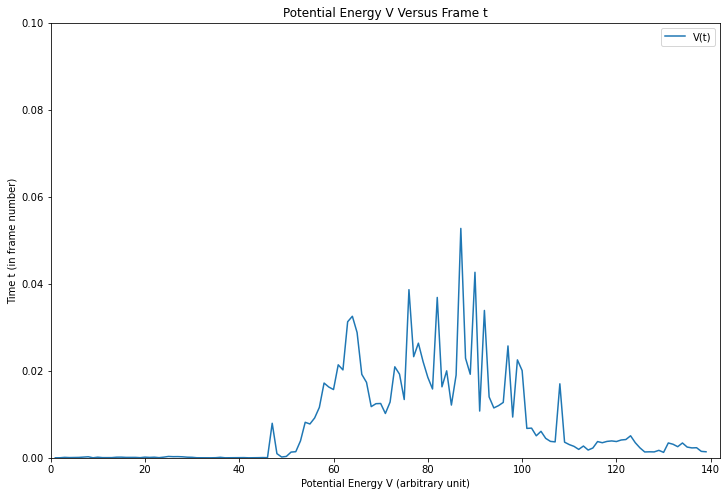

In [2]:
evt.getEvolution_V_t("001BA_Left_20160203_132002.avi", 1, "up")

Processing Frame: 1
Processing Frame: 2
Processing Frame: 3
Processing Frame: 4
Processing Frame: 5
Processing Frame: 6
Processing Frame: 7
Processing Frame: 8
Processing Frame: 9
Processing Frame: 10
Processing Frame: 11
Processing Frame: 12
Processing Frame: 13
Processing Frame: 14
Processing Frame: 15
Processing Frame: 16
Processing Frame: 17
Processing Frame: 18
Processing Frame: 19
Processing Frame: 20
Processing Frame: 21
Processing Frame: 22
Processing Frame: 23
Processing Frame: 24
Processing Frame: 25
Processing Frame: 26
Processing Frame: 27
Processing Frame: 28
Processing Frame: 29
Processing Frame: 30
Processing Frame: 31
Processing Frame: 32
Processing Frame: 33
Processing Frame: 34
Processing Frame: 35
Processing Frame: 36
Processing Frame: 37
Processing Frame: 38
Processing Frame: 39
Processing Frame: 40
Processing Frame: 41
Processing Frame: 42
Processing Frame: 43
Processing Frame: 44
Processing Frame: 45
Processing Frame: 46
Processing Frame: 47
Processing Frame: 48
P

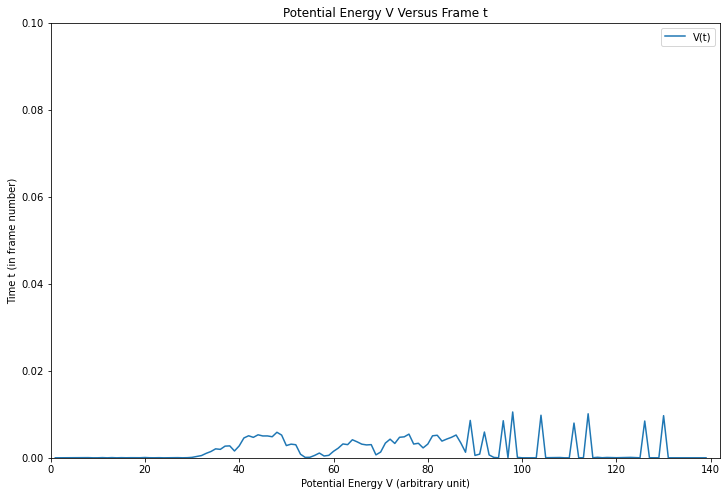

In [3]:
evt.getEvolution_V_t("003HA_Right_20160129_110735.avi", 1, "up")

Processing Frame: 1
Processing Frame: 2
Processing Frame: 3
Processing Frame: 4
Processing Frame: 5
Processing Frame: 6
Processing Frame: 7
Processing Frame: 8
Processing Frame: 9
Processing Frame: 10
Processing Frame: 11
Processing Frame: 12
Processing Frame: 13
Processing Frame: 14
Processing Frame: 15
Processing Frame: 16
Processing Frame: 17
Processing Frame: 18
Processing Frame: 19
Processing Frame: 20
Processing Frame: 21
Processing Frame: 22
Processing Frame: 23
Processing Frame: 24
Processing Frame: 25
Processing Frame: 26
Processing Frame: 27
Processing Frame: 28
Processing Frame: 29
Processing Frame: 30
Processing Frame: 31
Processing Frame: 32
Processing Frame: 33
Processing Frame: 34
Processing Frame: 35
Processing Frame: 36
Processing Frame: 37
Processing Frame: 38
Processing Frame: 39
Processing Frame: 40
Processing Frame: 41
Processing Frame: 42
Processing Frame: 43
Processing Frame: 44
Processing Frame: 45
Processing Frame: 46
Processing Frame: 47
Processing Frame: 48
P

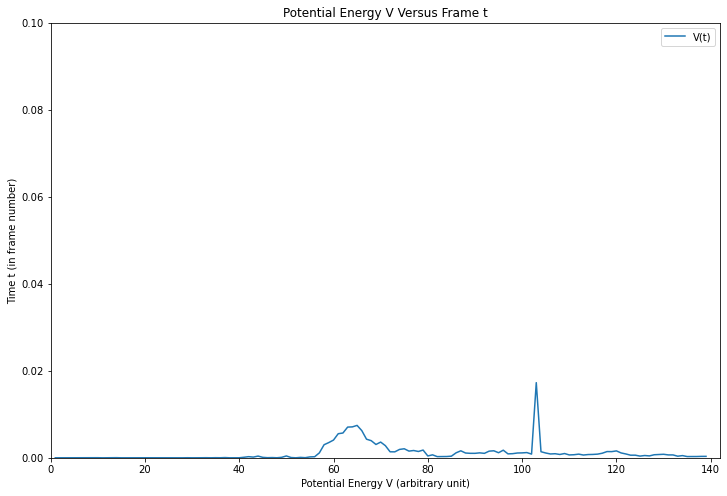

In [4]:
evt.getEvolution_V_t("007MA_Left_20160304_140907.avi", 1, "up")

For the above functions to work, we have adapted the evolution function on the evolutionTools.py script from what it is shown to be in the second notebook of the 1D problem.